In [134]:
#temperature forecast project

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
import warnings
warnings.filterwarnings("ignore")

In [136]:
#lets read the csvfile
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [137]:
#lets convert the csv file into dataframe
Temperature=pd.DataFrame(data=df)
Temperature

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [138]:
Temperature.shape
#it has 7752 rows and 25 columns

(7752, 25)

In [139]:
Temperature.dtypes
#the data types are float and object types

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [140]:
#let find for missing values:
Temperature.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [141]:
Temperature.drop([7750,7751],axis=0,inplace=True)

In [142]:
Temperature

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [143]:
Temperature["Present_Tmax"]=Temperature.Present_Tmax.fillna(Temperature["Present_Tmax"].mean())

Temperature["Present_Tmin"]=Temperature.Present_Tmin.fillna(Temperature["Present_Tmin"].mean())

Temperature["LDAPS_RHmin"]=Temperature.LDAPS_RHmin.fillna(Temperature["LDAPS_RHmin"].mean())

Temperature["LDAPS_RHmax"]=Temperature.LDAPS_RHmax.fillna(Temperature["LDAPS_RHmax"].mean())

Temperature["LDAPS_Tmax_lapse"]=Temperature.LDAPS_Tmax_lapse.fillna(Temperature["LDAPS_Tmax_lapse"].mean())

Temperature["LDAPS_Tmin_lapse"]=Temperature.LDAPS_Tmin_lapse.fillna(Temperature["LDAPS_Tmin_lapse"].mean())

Temperature["LDAPS_WS"]=Temperature.LDAPS_WS.fillna(Temperature["LDAPS_WS"].mean())

Temperature["LDAPS_LH"]=Temperature.LDAPS_LH.fillna(Temperature["LDAPS_LH"].mean())

Temperature["LDAPS_CC1"]=Temperature.LDAPS_CC1.fillna(Temperature["LDAPS_CC1"].mean())

Temperature["LDAPS_CC2"]=Temperature.LDAPS_CC2.fillna(Temperature["LDAPS_CC2"].mean())

Temperature["LDAPS_CC3"]=Temperature.LDAPS_CC3.fillna(Temperature["LDAPS_CC3"].mean())

Temperature["LDAPS_CC4"]=Temperature.LDAPS_CC4.fillna(Temperature["LDAPS_CC4"].mean())

Temperature["LDAPS_PPT1"]=Temperature.LDAPS_PPT1.fillna(Temperature["LDAPS_PPT1"].mean())

Temperature["LDAPS_PPT2"]=Temperature.LDAPS_PPT2.fillna(Temperature["LDAPS_PPT2"].mean())

Temperature["LDAPS_PPT3"]=Temperature.LDAPS_PPT3.fillna(Temperature["LDAPS_PPT3"].mean())

Temperature["LDAPS_PPT4"]=Temperature.LDAPS_PPT4.fillna(Temperature["LDAPS_PPT4"].mean())

Temperature["Next_Tmax"]=Temperature.Next_Tmax.fillna(Temperature["Next_Tmax"].mean())

Temperature["Next_Tmin"]=Temperature.Next_Tmin.fillna(Temperature["Next_Tmin"].mean())

In [144]:
Temperature["Date"]=pd.to_datetime(Temperature["Date"])

In [145]:
Temperature["day"]=pd.to_datetime(Temperature["Date"]).dt.day

In [146]:
Temperature["month"]=pd.to_datetime(Temperature["Date"]).dt.month

In [147]:
Temperature["year"]=pd.to_datetime(Temperature["Date"]).dt.year

In [148]:
Temperature.drop("Date",axis=1,inplace=True)

In [149]:
Temperature

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [150]:
Temperature.describe()
#Outliers may be present which we could check through the boxplots
#maximum standard deviation is present for solar radiation compared to other attributes
#since mean is similar to mean in most cases, very slight skewness is expected to be present

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,...,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768464,23.225742,56.758747,88.377125,29.613845,23.512997,7.096501,62.495273,0.368744,...,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275437,22.932837,16.370968,7.080645,2015.000000
std,7.211568,2.953516,2.398327,14.585101,7.149011,2.928357,2.330881,2.166519,33.516382,0.261096,...,0.050335,0.079406,54.256953,1.369833,428.996445,3.117994,2.478851,8.241331,2.238364,1.414305
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


In [151]:
#lets perform analysis

<AxesSubplot:xlabel='Present_Tmax'>

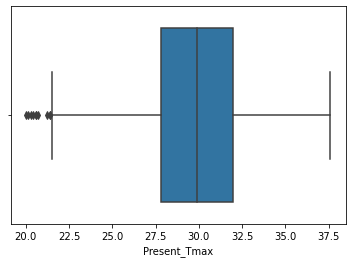

In [152]:
sns.boxplot(Temperature["Present_Tmax"])
#minimum value is 20. Median is 30 and maximum is 37.6
#some outliers are presnt

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

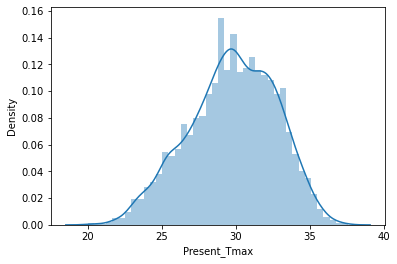

In [153]:
sns.distplot(Temperature["Present_Tmax"])
#slight skewness to the left is present
#maximum density is present between 28 to 32.5

<AxesSubplot:xlabel='Present_Tmin'>

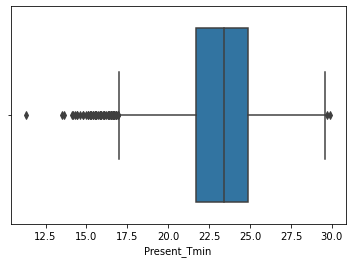

In [154]:
sns.boxplot(Temperature["Present_Tmin"])
#minimum value is 11.3. Median is 23.4 and maximum is 29.9
#some outliers are present

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

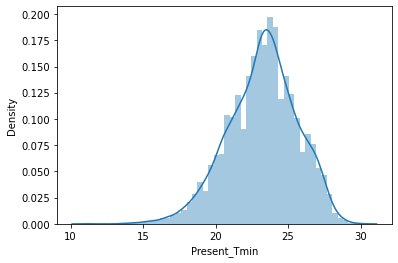

In [155]:
sns.distplot(Temperature["Present_Tmin"])
#slight skewness to the left is present
#maximum density is present between 22.5 to 25

<AxesSubplot:xlabel='LDAPS_RHmin'>

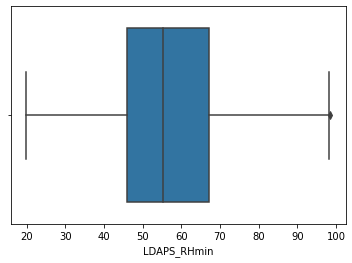

In [156]:
sns.boxplot(Temperature["LDAPS_RHmin"])
#minimum value is 19.8. Median is 55.3 and maximum is 98.5


<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

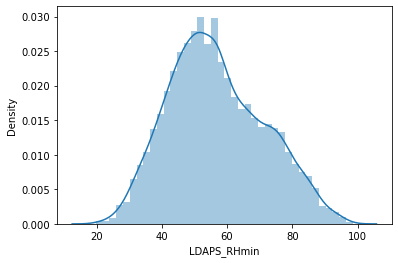

In [157]:
sns.distplot(Temperature["LDAPS_RHmin"])
#slight skewness to the left is present
#maximum density is present between 40 to 60

<AxesSubplot:xlabel='LDAPS_RHmax'>

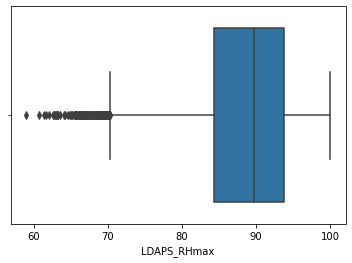

In [158]:
sns.boxplot(Temperature["LDAPS_RHmax"])
#minimum value is 58.9. Median is 90 and maximum is 100
#outliers are present

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

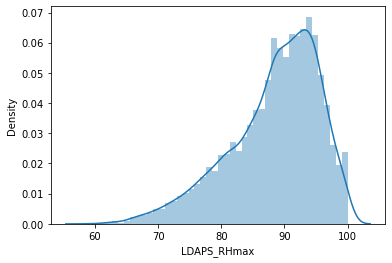

In [159]:
sns.distplot(Temperature["LDAPS_RHmax"])
#Left skewness is present
#maximum density lies between 85-95

<AxesSubplot:xlabel='LDAPS_Tmax_lapse'>

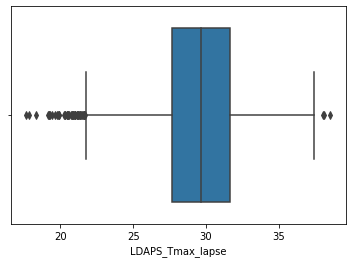

In [160]:
sns.boxplot(Temperature["LDAPS_Tmax_lapse"])
#minimum value is 17.62. Median is 30 and maximum is 38.5
#outliers are present

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

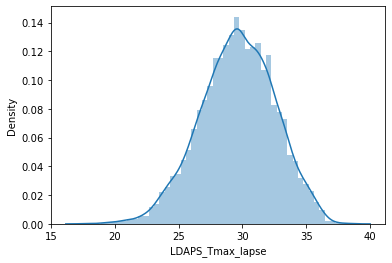

In [161]:
sns.distplot(Temperature["LDAPS_Tmax_lapse"])
#Left skewness is present
#maximum density is between 27.5 to 37.5

<AxesSubplot:xlabel='LDAPS_Tmin_lapse'>

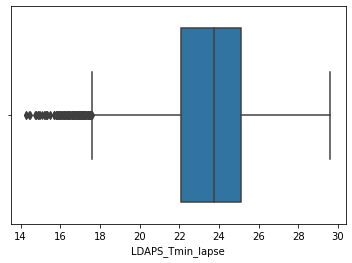

In [162]:
sns.boxplot(Temperature["LDAPS_Tmin_lapse"])
#outliers are present
#Minimum value is 14.Median value is 23. Maximum is 30

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

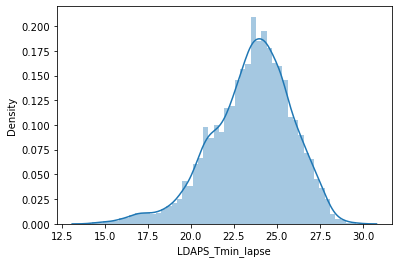

In [163]:
sns.distplot(Temperature["LDAPS_Tmin_lapse"])
#left skewness is present
#maximum density is between 22.5 to 25

<AxesSubplot:xlabel='LDAPS_WS'>

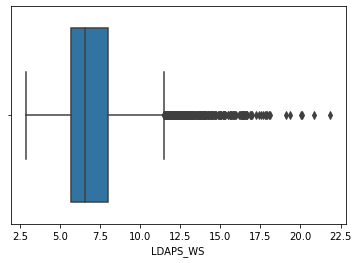

In [164]:
sns.boxplot(Temperature["LDAPS_WS"])
#Outliers are present
#minimum values is 2.8. Median value is 6.5. Maximum value is 21.9

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

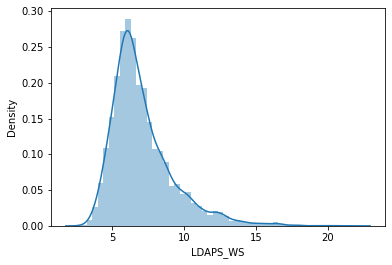

In [165]:
sns.distplot(Temperature["LDAPS_WS"])
#skewness to the right is present
#maximum density present is between 5 and 7.5

<AxesSubplot:xlabel='LDAPS_LH'>

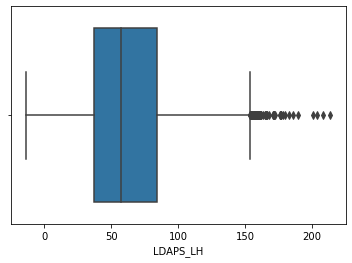

In [166]:
sns.boxplot(Temperature["LDAPS_LH"])
#outliers are present
#minimum value is -13. Median value is 57 and maximum value is 213

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

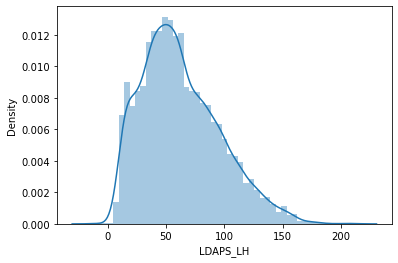

In [167]:
sns.distplot(Temperature["LDAPS_LH"])
#right skewness is present
#maximum density is present between 25 to 75

<AxesSubplot:xlabel='LDAPS_CC1'>

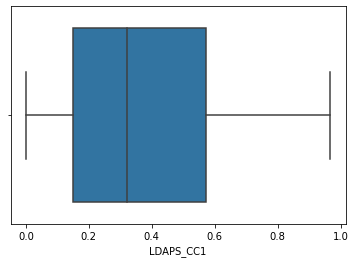

In [168]:
sns.boxplot(Temperature["LDAPS_CC1"])
#no outliers are present

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

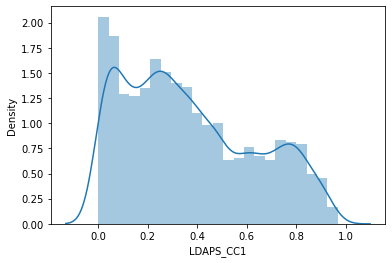

In [169]:
sns.distplot(Temperature["LDAPS_CC1"])
#there is skewness to the right

<AxesSubplot:xlabel='LDAPS_CC2'>

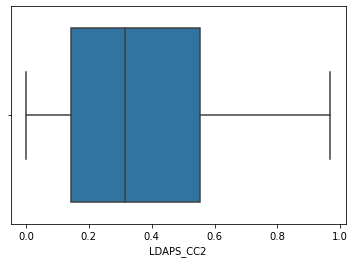

In [170]:
sns.boxplot(Temperature["LDAPS_CC2"])
#no outliers are present

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

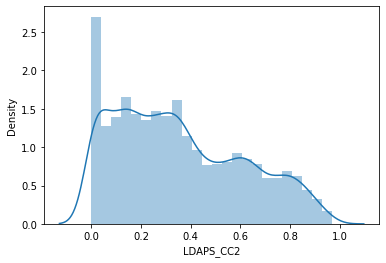

In [171]:
sns.distplot(Temperature["LDAPS_CC2"])
#there is skewness to the right

<AxesSubplot:xlabel='LDAPS_CC3'>

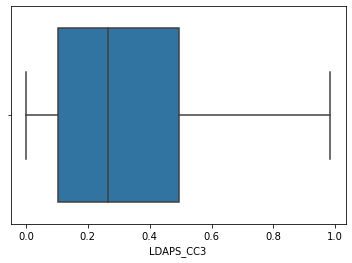

In [172]:
sns.boxplot(Temperature["LDAPS_CC3"])
#no outliers are present

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

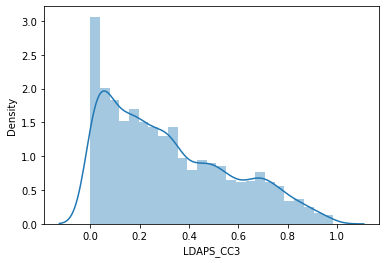

In [173]:
sns.distplot(Temperature["LDAPS_CC3"])
#there is skewness to the right

<AxesSubplot:xlabel='LDAPS_CC4'>

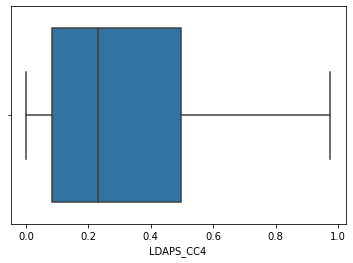

In [174]:
sns.boxplot(Temperature["LDAPS_CC4"])
#no outliers are present

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

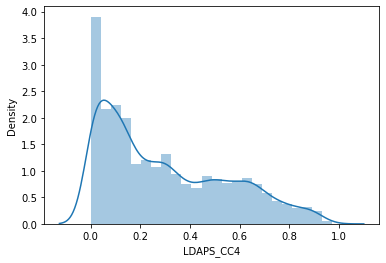

In [175]:
sns.distplot(Temperature["LDAPS_CC4"])
#there is skewness to the right

<AxesSubplot:xlabel='lat'>

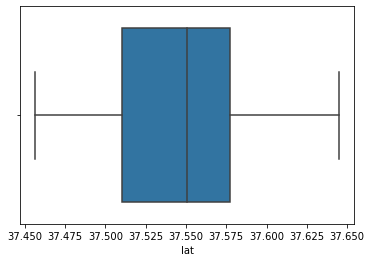

In [176]:
sns.boxplot(Temperature["lat"])
#no outliers are present

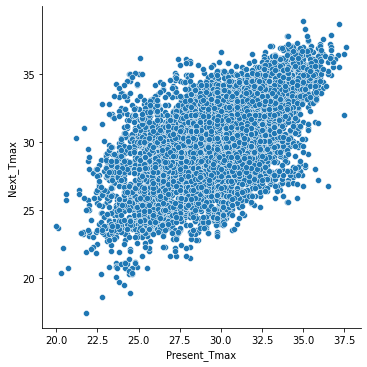

In [177]:
sns.relplot(x="Present_Tmax",y="Next_Tmax",kind="scatter",data=Temperature)
#There seems to be a direct relationship between the two variables. With an increase in Next_Tmax, Present_Tmax increases

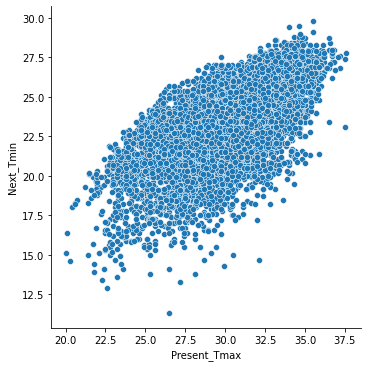

In [178]:
sns.relplot(x="Present_Tmax",y="Next_Tmin",kind="scatter",data=Temperature)
#There seems to be a direct relationship between the two variables. With an increase in Next_Tmin, Present_Tmax increases

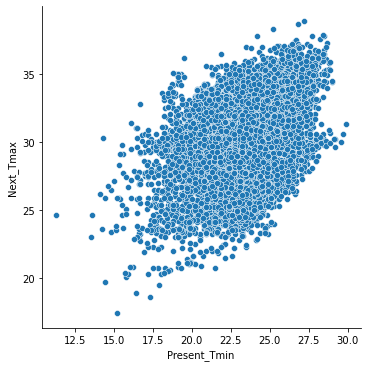

In [179]:
sns.relplot(x="Present_Tmin",y="Next_Tmax",kind="scatter",data=Temperature)
#There seems to be a direct relationship between the two variables. With an increase in Next_Tmax, Present_Tmin increases

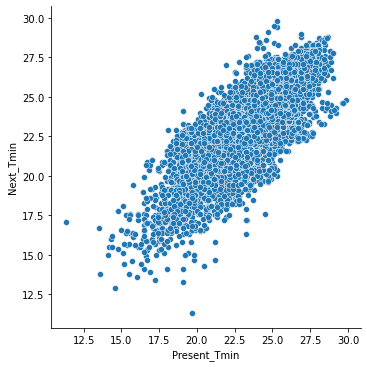

In [180]:
sns.relplot(x="Present_Tmin",y="Next_Tmin",kind="scatter",data=Temperature)
#There seems to be a direct relationship between the two variables. With an increase in Next_Tmin, Present_Tmin increases

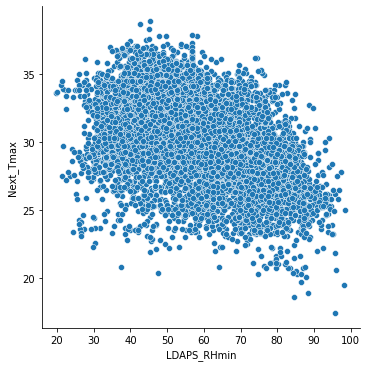

In [181]:
sns.relplot(x="LDAPS_RHmin",y="Next_Tmax",kind="scatter",data=Temperature)
#No conclusion can me made

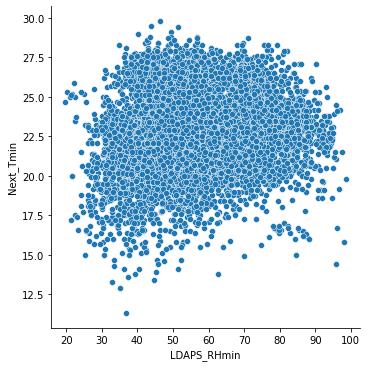

In [182]:
sns.relplot(x="LDAPS_RHmin",y="Next_Tmin",kind="scatter",data=Temperature)
#No conclusion can me made

zscore(Temperature)

z=np.abs(zscore(Temperature))

print(np.where(z>3))

Temperature_New=Temperature[(z<3).all(axis=1)]

Temperature_New
#Since data loss is more than 10% we retain the outliers

In [183]:
Temperature

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [184]:
Temperature.skew()

station             0.000000
Present_Tmax       -0.263016
Present_Tmin       -0.357573
LDAPS_RHmin         0.300230
LDAPS_RHmax        -0.850666
LDAPS_Tmax_lapse   -0.224211
LDAPS_Tmin_lapse   -0.579038
LDAPS_WS            1.556441
LDAPS_LH            0.667591
LDAPS_CC1           0.459196
LDAPS_CC2           0.471968
LDAPS_CC3           0.640094
LDAPS_CC4           0.665834
LDAPS_PPT1          5.324449
LDAPS_PPT2          5.713292
LDAPS_PPT3          6.368744
LDAPS_PPT4          6.743282
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.335958
Next_Tmin          -0.396876
day                 0.245482
month              -0.705241
year                0.000000
dtype: float64

In [185]:
#lets remove skewness
Temperature["LDAPS_RHmax"]=power_transform(Temperature["LDAPS_RHmax"].values.reshape(-1,1))

Temperature["LDAPS_Tmin_lapse"]=power_transform(Temperature["LDAPS_Tmin_lapse"].values.reshape(-1,1))

Temperature["LDAPS_WS"]=power_transform(Temperature["LDAPS_WS"].values.reshape(-1,1))

Temperature["LDAPS_LH"]=power_transform(Temperature["LDAPS_LH"].values.reshape(-1,1))

Temperature["LDAPS_CC3"]=power_transform(Temperature["LDAPS_CC3"].values.reshape(-1,1))

Temperature["LDAPS_CC4"]=power_transform(Temperature["LDAPS_CC4"].values.reshape(-1,1))

Temperature["LDAPS_PPT1"]=power_transform(Temperature["LDAPS_PPT1"].values.reshape(-1,1))

Temperature["LDAPS_PPT2"]=power_transform(Temperature["LDAPS_PPT2"].values.reshape(-1,1))

Temperature["LDAPS_PPT3"]=power_transform(Temperature["LDAPS_PPT3"].values.reshape(-1,1))

Temperature["LDAPS_PPT4"]=power_transform(Temperature["LDAPS_PPT4"].values.reshape(-1,1))

Temperature["DEM"]=power_transform(Temperature["DEM"].values.reshape(-1,1))

Temperature["Slope"]=power_transform(Temperature["Slope"].values.reshape(-1,1))

Temperature["Solar radiation"]=power_transform(Temperature["Solar radiation"].values.reshape(-1,1))

In [186]:
#lets split x and y for machine learning

In [187]:
x=Temperature.drop("Next_Tmax",axis=1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,0.273083,28.074101,-0.312802,0.093955,0.318613,0.233947,...,-0.458389,37.6046,126.991,1.835459,1.314447,1.850167,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,0.185956,29.850689,0.144492,-0.626407,-0.203817,0.225508,...,-0.458389,37.6046,127.032,0.056032,-0.385353,1.401217,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,-0.773879,30.091292,0.394994,-0.315043,-1.388661,0.209344,...,-0.458389,37.5776,127.058,-0.364677,-0.949335,1.381155,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,1.317399,29.704629,-0.174703,-0.657646,0.212713,0.216372,...,-0.458389,37.6450,127.022,0.084942,1.235549,1.358278,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,0.111055,29.113934,-0.104042,-0.594605,1.298021,0.151407,...,-0.458389,37.5507,127.135,-0.290515,-0.401751,1.367247,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,-1.384524,27.812697,-1.969281,-0.028014,-1.980121,0.052902,...,-0.458389,37.5507,127.040,-0.721794,-0.279523,-1.739436,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,-0.808510,26.704905,-2.103825,-0.570469,0.662510,0.066461,...,-0.458389,37.5102,127.086,-1.006373,-1.355104,-1.756893,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,-1.327662,26.352081,-1.832902,-0.308040,0.391282,0.030034,...,-0.458389,37.5372,126.891,-1.578769,-1.280717,-1.755049,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,-1.471166,27.010193,-1.845323,-0.063396,-0.356189,0.035874,...,-0.458389,37.5237,126.909,-1.401188,-1.073155,-1.761072,18.8,30,8,2017


In [188]:
y=Temperature["Next_Tmax"]
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7750, dtype: float64

In [189]:
#since the loss of data is around 10% we shall go ahead with the new dataset

In [190]:
#lets split x and y for machine learning

In [191]:
x=Temperature.drop("Next_Tmax",axis=1)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,0.273083,28.074101,-0.312802,0.093955,0.318613,0.233947,...,-0.458389,37.6046,126.991,1.835459,1.314447,1.850167,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,0.185956,29.850689,0.144492,-0.626407,-0.203817,0.225508,...,-0.458389,37.6046,127.032,0.056032,-0.385353,1.401217,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,-0.773879,30.091292,0.394994,-0.315043,-1.388661,0.209344,...,-0.458389,37.5776,127.058,-0.364677,-0.949335,1.381155,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,1.317399,29.704629,-0.174703,-0.657646,0.212713,0.216372,...,-0.458389,37.6450,127.022,0.084942,1.235549,1.358278,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,0.111055,29.113934,-0.104042,-0.594605,1.298021,0.151407,...,-0.458389,37.5507,127.135,-0.290515,-0.401751,1.367247,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,-1.384524,27.812697,-1.969281,-0.028014,-1.980121,0.052902,...,-0.458389,37.5507,127.040,-0.721794,-0.279523,-1.739436,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,-0.808510,26.704905,-2.103825,-0.570469,0.662510,0.066461,...,-0.458389,37.5102,127.086,-1.006373,-1.355104,-1.756893,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,-1.327662,26.352081,-1.832902,-0.308040,0.391282,0.030034,...,-0.458389,37.5372,126.891,-1.578769,-1.280717,-1.755049,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,-1.471166,27.010193,-1.845323,-0.063396,-0.356189,0.035874,...,-0.458389,37.5237,126.909,-1.401188,-1.073155,-1.761072,18.8,30,8,2017


In [196]:
y=Temperature["Next_Tmax"]
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7750, dtype: float64

In [197]:
#lets use standard scaler

In [198]:
S=StandardScaler()
x=S.fit_transform(x)

In [199]:
#lets perform train test split on the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5425, 26)
(2325, 26)
(5425,)
(2325,)


In [200]:
svm=SVR()
svm.fit(x_train,y_train)
#lets predict y values
pred1=svm.predict(x_test)
print(r2_score(y_test,pred1))
score1=cross_val_score(svm,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.8915630589103634
[0.74207743 0.58771043 0.68014607 0.80959111 0.6572158 ]
0.695348168317081
0.07550647645445004


In [201]:
#2)KNN
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
#predict y_values
pred2=knn.predict(x_test)
print(r2_score(y_test,pred2))
score2=cross_val_score(knn,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.8867044868321501
[0.56137684 0.39607673 0.46420106 0.74614799 0.5744756 ]
0.5484556448768161
0.11852799429058196


In [202]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
#predict y_values
pred3=ad.predict(x_test)
print(r2_score(y_test,pred3))
score3=cross_val_score(ad,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.7505734852815146
[0.65124485 0.62839271 0.62950235 0.77448268 0.64990709]
0.6667059358697418
0.054752319833822664


In [203]:
#4) RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
#predict y_values
pred4=rf.predict(x_test)
print(r2_score(y_test,pred4))
score4=cross_val_score(rf,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.9037118417869741
[0.67498242 0.65972342 0.65461747 0.8237261  0.65388701]
0.6933872850919619
0.06561032091044905


In [204]:
#the best fit model is adaboost. lets hypertune this model

parameters={"n_estimators":[25,50,100,75],"learning_rate":[1.0,0.5,1.2,2.2],"loss":["linear","square","exponential"],"random_state":[42,50,100,75]}
rsearch=RandomizedSearchCV(ad,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [1.0, 0.5, 1.2, 2.2],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [25, 50, 100, 75],
                                        'random_state': [42, 50, 100, 75]})

In [205]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

AdaBoostRegressor(learning_rate=2.2, random_state=50)
{'random_state': 50, 'n_estimators': 50, 'loss': 'linear', 'learning_rate': 2.2}
0.7776056021901292


In [206]:
#now lets put these parameters back to the best fit model

ad1=AdaBoostRegressor(random_state=50,n_estimators=50,loss="linear",learning_rate=2.2)
ad1.fit(x_train,y_train)
#predict y_values
pred5=ad1.predict(x_test)
print(r2_score(y_test,pred5))

0.7674572817318741


In [207]:
#lets serealise and dump the model
import joblib
joblib.dump(ad1,"ad1.obj")

['ad1.obj']

In [208]:
#now lets split in to c and d

c=Temperature.drop("Next_Tmin",axis=1)
c

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,day,month,year
0,1.0,28.7,21.4,58.255688,0.273083,28.074101,-0.312802,0.093955,0.318613,0.233947,...,-0.458389,37.6046,126.991,1.835459,1.314447,1.850167,29.1,30,6,2013
1,2.0,31.9,21.6,52.263397,0.185956,29.850689,0.144492,-0.626407,-0.203817,0.225508,...,-0.458389,37.6046,127.032,0.056032,-0.385353,1.401217,30.5,30,6,2013
2,3.0,31.6,23.3,48.690479,-0.773879,30.091292,0.394994,-0.315043,-1.388661,0.209344,...,-0.458389,37.5776,127.058,-0.364677,-0.949335,1.381155,31.1,30,6,2013
3,4.0,32.0,23.4,58.239788,1.317399,29.704629,-0.174703,-0.657646,0.212713,0.216372,...,-0.458389,37.6450,127.022,0.084942,1.235549,1.358278,31.7,30,6,2013
4,5.0,31.4,21.9,56.174095,0.111055,29.113934,-0.104042,-0.594605,1.298021,0.151407,...,-0.458389,37.5507,127.135,-0.290515,-0.401751,1.367247,31.2,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,-1.384524,27.812697,-1.969281,-0.028014,-1.980121,0.052902,...,-0.458389,37.5507,127.040,-0.721794,-0.279523,-1.739436,27.6,30,8,2017
7746,22.0,22.5,17.4,30.094858,-0.808510,26.704905,-2.103825,-0.570469,0.662510,0.066461,...,-0.458389,37.5102,127.086,-1.006373,-1.355104,-1.756893,28.0,30,8,2017
7747,23.0,23.3,17.1,26.741310,-1.327662,26.352081,-1.832902,-0.308040,0.391282,0.030034,...,-0.458389,37.5372,126.891,-1.578769,-1.280717,-1.755049,28.3,30,8,2017
7748,24.0,23.3,17.7,24.040634,-1.471166,27.010193,-1.845323,-0.063396,-0.356189,0.035874,...,-0.458389,37.5237,126.909,-1.401188,-1.073155,-1.761072,28.6,30,8,2017


In [209]:
d=Temperature["Next_Tmin"]
d

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7750, dtype: float64

In [210]:
S1=StandardScaler()
c=S1.fit_transform(c)

In [211]:
#lets perform train test split on the data
c_train,c_test,d_train,d_test=train_test_split(c,d,test_size=0.30,random_state=50)
print(c_train.shape)
print(c_test.shape)
print(d_train.shape)
print(d_test.shape)

(5425, 26)
(2325, 26)
(5425,)
(2325,)


In [212]:
svm1=SVR()
svm1.fit(c_train,d_train)
#lets predict y values
pred7=svm1.predict(c_test)
print(r2_score(d_test,pred7))
score7=cross_val_score(svm1,c,d,cv=5)
print(score7)
print(score7.mean())
print(score7.std())

0.9235255184033517
[0.56371864 0.64769146 0.78187689 0.83717729 0.81958349]
0.7300095541622225
0.10642139735151561


In [213]:
#2)KNN
knn1=KNeighborsRegressor()
knn1.fit(c_train,d_train)
#predict y_values
pred8=knn1.predict(c_test)
print(r2_score(d_test,pred8))
score8=cross_val_score(knn1,c,d,cv=5)
print(score8)
print(score8.mean())
print(score8.std())

0.882969568958851
[0.35758395 0.38420789 0.60419476 0.71667086 0.78351022]
0.5692335360017845
0.17199103802432222


In [214]:
ad1=AdaBoostRegressor()
ad1.fit(c_train,d_train)
#predict y_values
pred9=ad1.predict(c_test)
print(r2_score(d_test,pred9))
score9=cross_val_score(ad1,c,d,cv=5)
print(score9)
print(score9.mean())
print(score9.std())

0.8249007370934662
[0.65623848 0.61810766 0.76666626 0.82347032 0.84252638]
0.7414018200962843
0.08950302008707986


In [215]:
#4) RandomForestRegressor
rf1=RandomForestRegressor()
rf1.fit(c_train,d_train)
#predict y_values
pred10=rf1.predict(c_test)
print(r2_score(d_test,pred10))
score10=cross_val_score(rf1,c,d,cv=5)
print(score10)
print(score10.mean())
print(score10.std())

0.9119482416536879
[0.68750613 0.67627464 0.8217159  0.86887241 0.87358701]
0.7855912179373624
0.08666580275001615


In [216]:
#the best fit model is adaboost. lets hypertune this model

parameters={"n_estimators":[25,50,100,75],"learning_rate":[1.0,0.5,1.2,2.2],"loss":["linear","square","exponential"],"random_state":[42,50,100,75]}
rsearch=RandomizedSearchCV(ad1,parameters)
rsearch.fit(c_train,d_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [1.0, 0.5, 1.2, 2.2],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [25, 50, 100, 75],
                                        'random_state': [42, 50, 100, 75]})

In [217]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

AdaBoostRegressor(learning_rate=1.2, loss='square', random_state=42)
{'random_state': 42, 'n_estimators': 50, 'loss': 'square', 'learning_rate': 1.2}
0.8148658346319506


In [218]:
#now lets put these parameters back to the best fit model

ad2=AdaBoostRegressor(random_state=42,n_estimators=50,loss="square",learning_rate=1.2)
ad2.fit(c_train,d_train)
#predict y_values
pred10=ad1.predict(c_test)
print(r2_score(d_test,pred10))

0.8249007370934662


In [219]:
#lets searlise and dump the model

joblib.dump(ad2,"ad2.obj")

['ad2.obj']